In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../Data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Synopsis

There is an extensive amount of data that is stored in images and is available for analysis. On the web, images are everywhere and being able to algorithmically filter them (say for a search engine or to identify infringement) is an essential task. Scientifically, many studies rely on visual images to ascertain the presence or absence of some behavior (remember, a video is really just a series of images in time!).

To start we're going to work on:
* The basics of what an image is
* How to read an image into code
* How to manipulate an image in Python

# What is an image?

Seems like a silly question, right? When you open an image on your computer, you simply see an image. But if I inspect the file with the terminal, I actually get something like this:
    
    head -n10 ../Data/Picasso/1907-Self-Portrait.-13.jpg
    
    ����JFIF��;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 80
    ��C
    
    �B�ݲj"ݽKj��.\�k�9��9!#��I�#���D��pBG'���Չ�I>!�!�DKc�p�v��I�2\&�i��%���H2dۑi���'�ی���	o0=Ndc]�ӑ���E�����n6��%�3���oL��&��?.���xuDd�����0�c�,}Z�ݛ8�7�2H2�i�*d	ldC,c$c'Ӎ_{��Be�.	pr���Ɔ�!�	�p�r�/�D,�5	
What we see here is that the image file is still stored as textual data - just like everythign else. At the start of the file it says what the image file type is, how it was compressed, and the general quality of it. These are the pieces of information that another program needs to know in order to render the image from this string data. After that it's the actual image information that's stored with some symbols that we can see with ASCII and others that we would need unicode enabled to see. 

Fortunately, we don't have to learn how image information is stored since there is a simple function within `pylab` that will read an image for us. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import math
from pylab import imread

In [3]:
picasso_img = imread('../Data/Day8-Image-Analysis/Picasso/1907-Self-Portrait.-13.jpg')
picasso_img

array([[[151,  74,   6],
        [169,  92,  24],
        [183, 106,  38],
        ..., 
        [161, 119,   0],
        [162, 127,   1],
        [255, 229,  96]],

       [[176,  99,  31],
        [177, 100,  32],
        [177, 100,  32],
        ..., 
        [164, 120,   0],
        [163, 125,   0],
        [255, 228,  95]],

       [[187, 110,  42],
        [174,  97,  29],
        [167,  90,  22],
        ..., 
        [168, 119,   0],
        [164, 123,   0],
        [255, 225,  94]],

       ..., 
       [[176, 169, 140],
        [174, 167, 138],
        [176, 169, 140],
        ..., 
        [158, 158, 150],
        [159, 159, 151],
        [248, 248, 240]],

       [[166, 161, 132],
        [165, 160, 131],
        [167, 162, 133],
        ..., 
        [198, 198, 190],
        [178, 178, 170],
        [255, 255, 247]],

       [[163, 159, 132],
        [161, 157, 130],
        [163, 159, 132],
        ..., 
        [194, 194, 184],
        [166, 166, 156],
        [239, 239,

## Images are actually arrays (to the computer)!

An image is actually just an array once it's been decompressed. The digital image is essentially a 2-dimensional grid of values, where each element in this matrix corresponds to a pixel (so the larger the number of megapixels for your camera, the bigger the grid!). Each element is then a list of three values - the Red value, the Green value, and the Blue value. The values for and mixture of these three colors then specify the final color that should appear in the pixel (if there are more than three then the image is using a colorscheme that is not RGB). 

We can double check that everything is right by plotting the image array with matplotlib. 

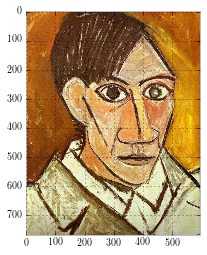

In [31]:
plt.imshow(picasso_img)
plt.show()

Excellent! We can see the image (and it's even easy to tell the number of pixels in it)!. We can see that this grid of RGB values can fully specify the image. 

But now let's look a little bit further at the `picasso_img` variable itself. That nomenclature of `array(` is a bit different than what we've experienced so far.

In [32]:
print('type is:', type(picasso_img))
print()
print(picasso_img)

type is: <class 'numpy.ndarray'>

[[[151  74   6]
  [169  92  24]
  [183 106  38]
  ..., 
  [161 119   0]
  [162 127   1]
  [255 229  96]]

 [[176  99  31]
  [177 100  32]
  [177 100  32]
  ..., 
  [164 120   0]
  [163 125   0]
  [255 228  95]]

 [[187 110  42]
  [174  97  29]
  [167  90  22]
  ..., 
  [168 119   0]
  [164 123   0]
  [255 225  94]]

 ..., 
 [[176 169 140]
  [174 167 138]
  [176 169 140]
  ..., 
  [158 158 150]
  [159 159 151]
  [248 248 240]]

 [[166 161 132]
  [165 160 131]
  [167 162 133]
  ..., 
  [198 198 190]
  [178 178 170]
  [255 255 247]]

 [[163 159 132]
  [161 157 130]
  [163 159 132]
  ..., 
  [194 194 184]
  [166 166 156]
  [239 239 229]]]


Ah-ha! So it's not actually a list but a Numpy array!

Numpy is a library that handles numerical calculations. It is extremely fast and efficient at what it does, which is why it's used heavily in scientific computing and any area where speed is at a premium. 

Numpy arrays are conceptually similar to lists, but the implementation and features are different. Two new built-in methods that are exclusive to Numpy arrays that you will use over and over again are `shape` and `dtype`. 

In [6]:
picasso_img.shape

(766, 597, 3)

`shape` Tells you the dimensions of the grid immediately (try doing that as quickly with nested lists!). So here we know that the first dimension of the matrix is 766 (how tall it is), the second dimension is 597 (how wide it is), and the third dimension is 3 (the depth, or saying that every element has an array with 3 elements).

`dtype` is similarly useful.

In [7]:
picasso_img.dtype

dtype('uint8')

`dtype` tells us the data type, which in this case is unsigned integer 8-bit. This is important to check, because if you have mixed data types (i.e. a string accidentally ends up in your list of numbers), Numpy reverts to the broadest data type. Which means that you will some functionality.

In [8]:
example = np.array([0, 1, 3, 4, 'cat'])
example.dtype

dtype('<U21')

In [9]:
example * 2

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U21') dtype('<U21') dtype('<U21')

vs.

In [10]:
example_two = np.array([0, 1, 3, 4])
example_two.dtype

dtype('int64')

In [11]:
example_two * 2

array([0, 2, 6, 8])

## So what is RGB

If we go to [Wikipedia](https://en.wikipedia.org/wiki/RGB_color_model), we find:

    The RGB color model is an additive color model in which red, green and blue light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, red, green and blue.
    
So the question is, what scale is used for each color value? With numpy we can find that out easily

In [12]:
picasso_img.max()

255

In [13]:
picasso_img.min()

0

So each of the color elements has a value from `0` to `255`, and the mixture of the R, G, and B values produces the final color.

The color values are actually stored in that order in the matrix and we can easily check that by plotting.

split representation:


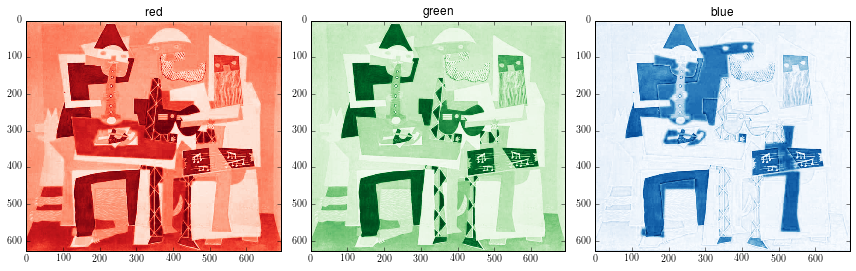

combined representation:


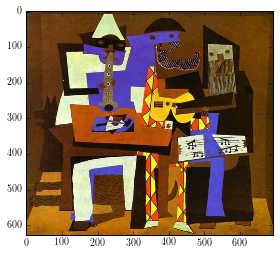

In [4]:
musicians = imread('../Data/Day8-Image-Analysis/Picasso/1921-Three_Musicians.-25.jpg')

print('split representation:')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12, 6))
cmaps = [cm.Reds, cm.Greens, cm.Blues]
labels = ['red', 'green', 'blue']

for i in range(3):
    ax[i].imshow(musicians[:,:,i], cmap=cmaps[i])
    ax[i].set_title(labels[i])
    
plt.tight_layout()
plt.show()

print('combined representation:')
plt.imshow(musicians)
plt.show()

and this means that knowing the structure of an image we could easily create one. 

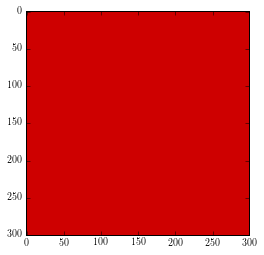

In [15]:
# this code creates a patch of color with the specified r, g, b values
r = 50
g = 0
b = 0

color_patch = np.ones(shape=(300, 300, 3)) # make a 3D numpy array filled with zeros
color_patch[:,:,0] *= r   # red
color_patch[:,:,1] *= g   # green
color_patch[:,:,2] *= b   # blue

plt.imshow(color_patch) # show color
plt.show()

The best way to understand how these colors mix is to play a bit with it. 

You could use a [tool](http://www.colortools.net/color_mixer.html) online to get a basic sense or just play with the code above. For example - try to make a yellow grid.

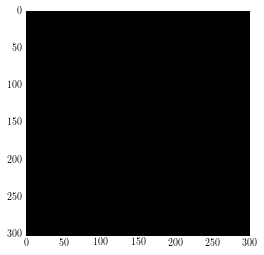

In [16]:
#By modifying this code

r = 0
g = 0
b = 0

color_patch = np.ones(shape=(300, 300, 3)) # make a 3D numpy array filled with ones
color_patch[:,:,0] *= r   # red
color_patch[:,:,1] *= g   # green
color_patch[:,:,2] *= b   # blue

plt.imshow(color_patch) # show color
plt.show()



So by now you've noticed that how we access parts of a numpy array differs from a list (and is rather similar to Pandas, there's a reason for that!). 

Essentially we can slice an array on any dimension that we want. For example, if we wanted a column of data we could do that with one slice like so:

In [17]:
picasso_img[:, 0, :].shape

(766, 3)

This type of slicing isn't possible if the data was actually stored as a list (and not a numpy array). 

And we can keep doing this on every column

In [18]:
picasso_img[:, 0, 0].shape

(766,)

So we could easily plot only a portion of the image using the built-in slicing

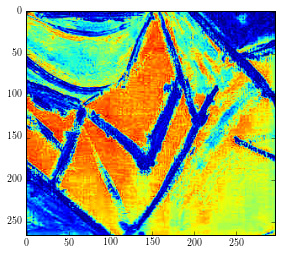

In [19]:
plt.imshow(picasso_img[500:, 300:, 2])

And change the entire channel easily, like removing red from an image

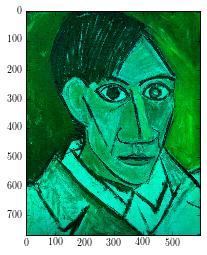

In [20]:
no_red = picasso_img[:]
no_red[:, :, 0] = 0

plt.imshow(no_red)

### Exercises

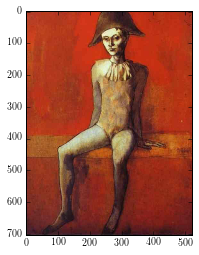

In [5]:
#Q1. reverse the x axis on the image

flipped_image = imread('../Data/Day8-Image-Analysis/Picasso/1905-Harlequin_Sitting_on_a_Red__Couch.-12.jpg')


# add code here
# flipped_image = flipped_image
# 

plt.imshow(flipped_image)
plt.show()

In [ ]:
#Q2. make an image with only the rightmost muscician
# (ie. slice the x and y axis so other musicians are cropped out)

just_bearded_guy = imread('../Data/Day8-Image-Analysis/Picasso/1921-Three_Musicians.-25.jpg')

# add code here
# just_bearded_guy = just_bearded_guy

plt.imshow(just_bearded_guy)
plt.show()

In [ ]:
#Q3. reverse the order of colors so they go: 'Blue', 'Green', 'red'

recolored_painting = imread( '../Data/Day8-Image-Analysis/Picasso/1900-A_Spanish_Couple_in_front_of_an_Inn.-34.jpg')

# add code here
# recolored_painting = recolored_painting

plt.imshow(recolored_painting)
plt.show()

In [ ]:
#Q4. shrink the size of the image so it is 1/2 of origional size

shrunken_image = imread('../Data/Day8-Image-Analysis/Picasso/1903-The_Old_Guitarist.-7.jpg')

# add code here
# shrunken_image = shrunken_image

plt.imshow(shrunken_image)
plt.show()

# Array Methods

## Column and Row operations

Many NumPy functions (especially summary statistics) allow you to specify if the operation should be performed on the rows or columns with the `axis` keyword.

Some functions like [`np.concatenate()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) allow you to make new arrays by sticking existing arrays together

In [22]:
a = np.array([[19.72, 20.34], 
              [21.30, 17.26]])



print(a)
print('\nmean, no axis specified')
print(a.mean())

print('\nmean, axis 0')
print(a.mean(axis=0))

print('\nmean, axis 1')
print(a.mean(axis=1))

[[ 19.72  20.34]
 [ 21.3   17.26]]

mean, no axis specified
19.655

mean, axis 0
[ 20.51  18.8 ]

mean, axis 1
[ 20.03  19.28]


Using these functions we can profile the usage of color throughout an image. 

One example would be, how does the color usage change as we scan through the rows of an image? This can be useful for numerically identifying different portions of an image that may be of interest. 

To make this simple, let's use a painting from Picasso's blue period.

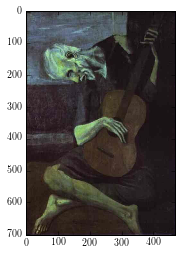

In [6]:
music = imread('../Data/Day8-Image-Analysis/Picasso/1903-The_Old_Guitarist.-7.jpg')
plt.imshow(music)

And now let's plot the row average (or said another way, what is color usage as a function of the row)

/Users/adampah/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


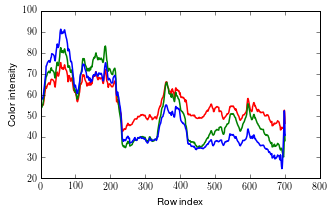

In [24]:
colors = ['r', 'g', 'b']
fig, ax = plt.subplots(figsize=(5,3))
for i in range(3):
    ax.plot(music.mean(axis=1)[:, i], color=colors[i], linewidth=1.5)
ax.set_xlabel('Row index')
ax.set_ylabel('Color intensity')
ax.legend(loc='best')

So we can see that at the top of the image there is a majority of blue - which corresponds with what we see (the blue background dominates the image).

What about if we plot color intensity as a function of the column?

In [25]:
#Plot color intensity as a function of the column



And here we can see that there doesn't appear to be a single column where blue is the largest color channel.

Now let's move onto something more challenging since you have a command of the basics.

# The full dataset

There is an entire directory of Picasso paintings in `../Data/Picasso/`. Our goal will be to pick out, based on his color usage, Picasso's blue period. 

Write code to plot the average color channel level across time 

In [ ]:
#Your code goes here


So it's actually a bit hard to discern with the scatterplot what is going on because all of the average usages move so much from painting to painting and year to year. 

In this case, it would be easier to visualize this in some aggregate manner (either grouped bars per year, box plots, or points with errors). Does this actually help?

## Picking out Picasso's Blue Period (1901-1904)

Although Picasso has a number of images that are refered to as his 'Blue Period', it's not immediatly obvious
from the graphs we just created when that period is.

One reason that we can't quite see it is that we're ignoring how much blue should/would be in a painting generally!

When a situation like this arises it's important to take into account 'what is normal' in order to identify what isn't!

How do you think that we should account for this?

In [ ]:
#How?


Which paintings do you think should be his 'blue' paintings? How would you justify this?

I want you to think about how you approach real problems (such as classifying painting themes) from a quantitative instead of qualitative approach.

# Filtering

What if we are only interest in certain parts of an image that meet a certain criteria? Like having a blue channel value >50?

It's possible to do that using masks with a numpy array.

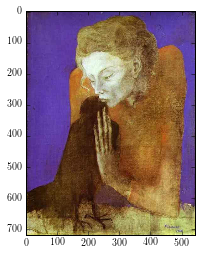

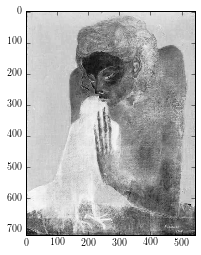

In [8]:
woman = imread('../Data/Day8-Image-Analysis/Picasso/1904-Woman_with_a_Crow.-4.jpg')

plt.imshow(woman)
plt.show()

woman_reds = woman[:,:, 0]
plt.imshow(woman_reds, cmap='Greys')
plt.show()

Slicing off the first layer has changed the shape of the image.

In [48]:
print('original shape', woman.shape)
print('new shape', woman_reds.shape)

original shape (719, 543, 3)
new shape (719, 543)


This new two dimensional image consists of many numbers between 0 and 255

In [49]:
woman_reds

array([[118,  81,  49, ...,  78,  80,  79],
       [127,  87,  51, ...,  88,  98, 105],
       [156, 115,  75, ...,  97, 114, 128],
       ..., 
       [227, 215, 209, ..., 225, 237, 244],
       [230, 215, 202, ..., 188, 205, 219],
       [239, 224, 211, ..., 157, 175, 192]], dtype=uint8)

In order to create a boolean array, we just use boolean logic on the previous array.

In [50]:
image_mask = woman_reds > 100
image_mask

array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False,  True],
       [ True,  True, False, ..., False,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

type: <class 'numpy.ndarray'>
dtype bool
shape (719, 543)


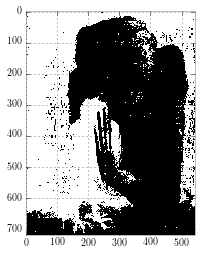

In [51]:
print('type:', type(image_mask))
print('dtype', image_mask.dtype)
print('shape', image_mask.shape)

plt.imshow(image_mask, cmap='Greys', interpolation='nearest')
plt.show()

by multiplying the masked array with the image, we can exclude any points that are 'False' in the boolean array.
This is essentially like multiplying those values by zero.

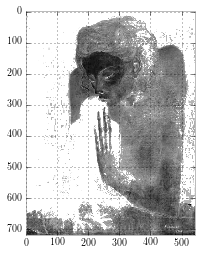

In [52]:
masked_image = woman_reds * image_mask
plt.imshow(masked_image, cmap='Greys')
plt.show()

We can string together multiple boolean operations by using the `&` symbol.

Three dimensional masks work as well, they just must be the same dimensions as the image you want to apply them too.

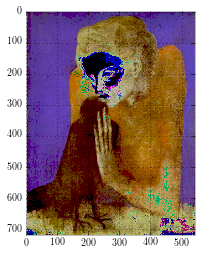

In [53]:
image_mask3 = (woman > 50) & (woman < 200)

masked_image3 = woman * image_mask3
plt.imshow(masked_image3, cmap='Greys')
plt.show()